# New heading

# В этом Notebook я попробую использовать LlamaIndex 

В качестве данных я использую https://static.lada.ru/vaz/files/exp_manual/lada_vesta_re_09_08_2023.pdf \
Я просто скопировал весь текст (CTRL+A, CTRL+C) из PDF, и вставил его в текстовый файл.

In [33]:
# для отображения картинок
from IPython.display import Image

In [95]:
import llama_index
import logging
import sys
import openai
import os

In [6]:
if 'OPENAI_API_KEY' in os.environ:
    print(os.environ['OPENAI_API_KEY'][:10])
else:
    print('set your OPEN API KEY! please')

sk-lyTMdj5


In [7]:

from llama_index import 
    # превращаем текст в embeddings через OpenAI
    VectorStoreIndex,
    # загружает документы
    SimpleDirectoryReader

In [96]:
# будем смотреть что библиотеки выдают
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))
# этта строка будет генерировать много вывода в последующих запросах
openai.log = "debug"

In [97]:
documents = SimpleDirectoryReader('data').load_data()

DEBUG:llama_index.readers.file.base:> [SimpleDirectoryReader] Total files added: 1
> [SimpleDirectoryReader] Total files added: 1
> [SimpleDirectoryReader] Total files added: 1


In [104]:
type(documents), len(documents)

(list, 1)

In [102]:
# посмотрим свойства документа
type(documents[0]), dir(documents[0])

(llama_index.schema.Document,
 ['Config',
  '__abstractmethods__',
  '__annotations__',
  '__class__',
  '__class_vars__',
  '__config__',
  '__custom_root_type__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__exclude_fields__',
  '__fields__',
  '__fields_set__',
  '__format__',
  '__ge__',
  '__get_validators__',
  '__getattribute__',
  '__getstate__',
  '__gt__',
  '__hash__',
  '__include_fields__',
  '__init__',
  '__init_subclass__',
  '__iter__',
  '__json_encoder__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__post_root_validators__',
  '__pre_root_validators__',
  '__pretty__',
  '__private_attributes__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__repr_args__',
  '__repr_name__',
  '__repr_str__',
  '__rich_repr__',
  '__schema_cache__',
  '__setattr__',
  '__setstate__',
  '__signature__',
  '__sizeof__',
  '__slots__',
  '__str__',
  '__subclasshook__',
  '__try_update_forward_refs__',
  '__validators__',
  '_

In [103]:
len(doc)

TypeError: object of type 'Document' has no len()

In [105]:
# свойства и значения документа
for i, d in enumerate(doc):
    if d[0]=='text':continue
    print(i, d)

0 ('id_', '926336ae-04be-4628-9df0-d7c99d896c39')
1 ('embedding', None)
2 ('metadata', {})
3 ('excluded_embed_metadata_keys', [])
4 ('excluded_llm_metadata_keys', [])
5 ('relationships', {})
6 ('hash', '540ef9cde7a68ddc69fac05c25de70884c0292b2dcb3f265f19b97b19c5f24f1')
8 ('start_char_idx', None)
9 ('end_char_idx', None)
10 ('text_template', '{metadata_str}\n\n{content}')
11 ('metadata_template', '{key}: {value}')
12 ('metadata_seperator', '\n')


In [106]:
doc = documents[0]

In [107]:
doc.doc_id

'd32e6048-4895-4eed-898d-63ae5d20afa0'

In [108]:
doc.node_id, doc.node_info

('d32e6048-4895-4eed-898d-63ae5d20afa0', {'start': None, 'end': None})

In [109]:
doc.relationships

{}

In [110]:
doc.validate

<bound method BaseModel.validate of <class 'llama_index.schema.Document'>>

In [112]:
# похоже что это выдает demo документ
doc.example()

Document(id_='d6a0104c-c30f-4829-8aba-bc55543099f9', embedding=None, metadata={'filename': 'README.md', 'category': 'codebase'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='d83d728566b7b79bfb0d9663f5b22bd448ce10257686dca16194e90d8f90f97c', text='\nContext\nLLMs are a phenomenonal piece of technology for knowledge generation and reasoning. \nThey are pre-trained on large amounts of publicly available data.\nHow do we best augment LLMs with our own private data?\nWe need a comprehensive toolkit to help perform this data augmentation for LLMs.\n\nProposed Solution\nThat\'s where LlamaIndex comes in. LlamaIndex is a "data framework" to help \nyou build LLM  apps. It provides the following tools:\n\nOffers data connectors to ingest your existing data sources and data formats \n(APIs, PDFs, docs, SQL, etc.)\nProvides ways to structure your data (indices, graphs) so that this data can be \neasily used with LLMs.\nProvides an advanced retrieval/query

In [113]:
doc.class_name

<bound method Document.class_name of <class 'llama_index.schema.Document'>>

In [114]:
doc.node_id, doc.node_info

('d32e6048-4895-4eed-898d-63ae5d20afa0', {'start': None, 'end': None})

In [115]:
doc.relationships

{}

In [118]:
# не понимаю смысла этого метода
doc.validate({'дверь':10})

Document(id_='f7ca5695-007d-43f5-8d52-d638d8d7209f', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e8310c060f61caaff8a', text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

In [119]:
# не понимаю смысла этого метода
doc.validate({'text':'дверь'})

Document(id_='d154e025-53eb-4cf8-bd61-3b420019550f', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='aed5c25e34888282e6a53aaa70f6deb1a8a41b5bcb8c7d22a5c785ca03b6a625', text='дверь', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

# запрос OpenAI
тут мы отправляем наши документы в OpenAI

In [ ]:

index = VectorStoreIndex.from_documents(documents)

In [121]:
index.storage_context.persist()

DEBUG:fsspec.local:open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/docstore.json
open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/docstore.json
open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/docstore.json
DEBUG:fsspec.local:open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/index_store.json
open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/index_store.json
open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/index_store.json
DEBUG:fsspec.local:open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/vector_store.json
open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/vector_store.json
open file: /mnt/BE2AE4662AE41CE1/projects/ods_mlsd/LLM_knowledgebase/notebooks/storage/vector_store.json
DEBUG:fsspec.

In [153]:
# сохраняем данные на диск
index.storage_context.persist()

In [154]:
!ls -vhl ./storage/

total 17M
-rwxrwxrwx 1 root root 2.4M Sep 26 06:27 docstore.json
-rwxrwxrwx 1 root root   18 Sep 26 06:27 graph_store.json
-rwxrwxrwx 1 root root  37K Sep 26 06:27 index_store.json
-rwxrwxrwx 1 root root  15M Sep 26 06:27 vector_store.json


In [162]:
from llama_index import load_index_from_storage

In [164]:
storage_context2 = StorageContext.from_defaults(persist_dir="./storage")
index2 = load_index_from_storage(storage_context2)

In [155]:
dir(index)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_nodes_to_index',
 '_aget_node_with_embedding',
 '_async_add_nodes_to_index',
 '_build_index_from_nodes',
 '_delete_node',
 '_docstore',
 '_get_node_with_embedding',
 '_graph_store',
 '_index_struct',
 '_insert',
 '_is_protocol',
 '_service_context',
 '_show_progress',
 '_storage_context',
 '_store_nodes_override',
 '_use_async',
 '_vector_store',
 'as_chat_engine',
 'as_query_engine',
 'as_retriever',
 'build_index_from_nodes',
 'delete',
 'delete_nodes',
 'delete_ref_doc',
 'docstore',

In [156]:
index.summary

'None'

# Задаем вопросы модели

In [157]:
query_engine = index.as_query_engine()

In [158]:
response = query_engine.query("Как мне заменить лапмочку?")

In [159]:
print(response)


Вы можете заменить лампочку, следуя указанным ниже действиям:
1. Откройте крышку/дверь багажного отделения.
2. Откройте лючок обивки багажного отделения, расположенный в зоне установки лампочки.
3. Поверните патрон-разъем против часовой стрелки и выньте его из посадочного места вместе с лампочкой.
4. Извлеките старую лампочку из патрона и замените ее новой.
5. Установите патрон-разъем на место в обратном порядке.
6. Проверьте исправность замененной лампочки.

Если вам кажется, что замена сложна, рекомендуется обратиться к дилеру LADA.


In [ ]:
response = query_engine.query("Какие USB порты есть в машине?")

In [152]:
# отключаем debug информацию
openai.util.logging.getLogger().setLevel(logging.WARNING)

In [167]:
response = query_engine.query("Как мне заменить лапмочку в багажнике?")
print(response)


Для замены лампы в багажнике, вам необходимо выполнить следующие действия:
1. Вставьте отвертку в паз и аккуратно отожмите пружинную защелку плафона.
2. Освободив зацеп плафона, аккуратно выньте его из посадочного места.
3. Замените лампу.
4. После замены лампы установите зацеп плафона в посадочное место и прижмите противоположную сторону плафона до фиксации пружинной защелки.
5. Проверьте исправность замененной лампы.


In [168]:
response = query_engine.query("Как мне заменить лапмочку в колесе?")
print(response)


Для замены лампочки в колесе, вам необходимо обратиться к дилеру LADA.


In [160]:
response = query_engine.query("Где в машине расположены USB порты?")
print(response)

USB порты в машине расположены в вещевом ящике и на центральной консоли.


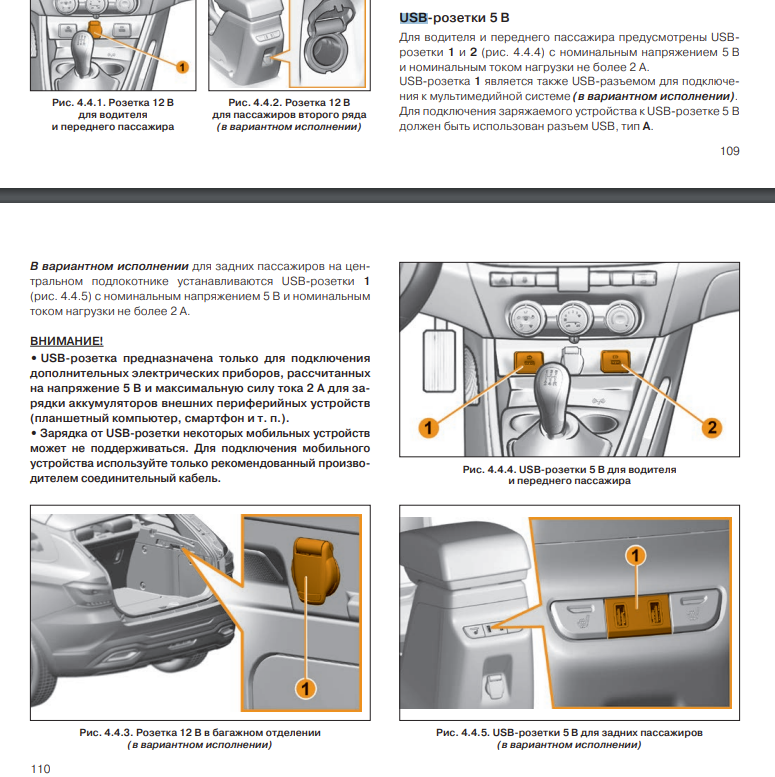

In [36]:
Image('./images/Screenshot 2023-09-26 120304.png')

# Задаем глупые вопросы модели

In [38]:
response = query_engine.query("Как мне приготовить стэйк в машине? отвечай на русском")
print(response)

Не рекомендуется готовить стейк в автомобиле. Автомобиль не предназначен для приготовления пищи и не оборудован соответствующими устройствами и системами безопасности для этой цели. Рекомендуется готовить пищу в специально оборудованной кухне или на гриле.


In [40]:
response = query_engine.query("Могу ли я подняться на второй этаж на этой машине? отвечай на русском")

print(response)

Нет, вы не можете подняться на второй этаж на этой машине.


In [28]:
response = query_engine.query("Подойдут ли делати от вертолета к этой машине? отвечай на русском")
print(response)

Данный текст не содержит информации о том, подойдут ли детали от вертолета к данной машине.


In [29]:
response = query_engine.query("Я сел в машину и не нашел руля, что мне делать? отвечай на русском")
print(response)

При отсутствии руля в автомобиле, вам следует обратиться к инструкции по эксплуатации автомобиля или обратиться к специалистам автосервиса для выяснения причины отсутствия руля и решения проблемы.


In [30]:
response = query_engine.query("Я сел в машину и не увидел перед собой руль, что мне делать? отвечай на русском")
print(response)

Проверьте, находится ли руль в положении, когда он заблокирован. Если руль заблокирован, попробуйте повернуть его вправо или влево до щелчка, чтобы разблокировать его. Если руль не разблокируется, обратитесь к дилеру LADA для получения помощи.


In [31]:
response = query_engine.query("есть ли в этой машине лампочка в вещевом ящике? отвечай на русском")
print(response)

Да, в этой машине есть лампочка в вещевом ящике.


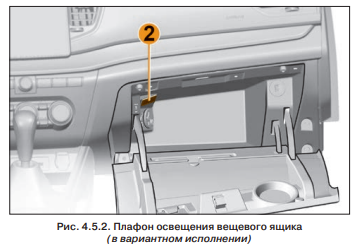

In [34]:
Image("images/Screenshot 2023-09-26 114917.png")

In [82]:
response = query_engine.query("Каким предложением заканчивается документ?")
print(response)

Данное руководство по эксплуатации содержит описание модели, основанное на ее технических характеристиках, существующих на момент написания документа. Конструкция автомобиля постоянно совершенствуется, поэтому отдельные узлы и детали, а также варианты исполнения и комплектации могут несколько отличаться от описанных в руководстве.


# Затраты

Итого за кучу запросов я потратил `7` центов. из них 2 раза я отправлял документ на индексация в OpenAI

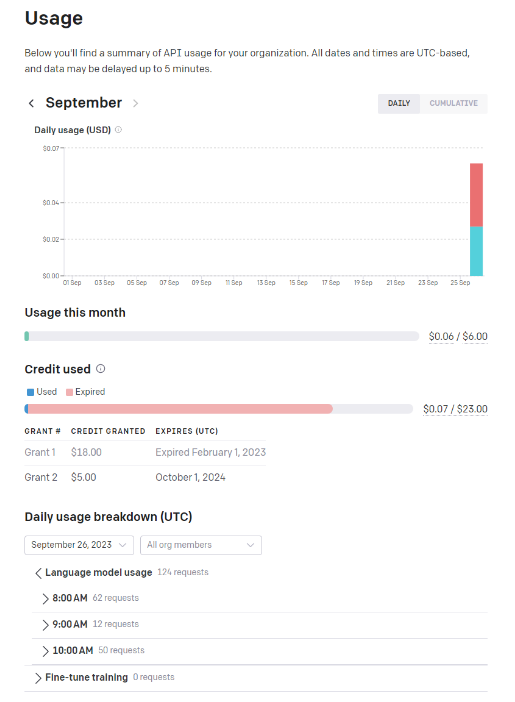

In [165]:
Image('images/Screenshot 2023-09-26 134105.png')

как видно ниже сам документ занял `172,890` токенов и индексироваться `text-embedding-ada-002-v2` поделью за `45 http запросов`

Большой текст может разбиваться на множество маленьких запросов, и поэтому можно увидеть что система получила `50 запросов`. А я сделал `6 вызовов функции`.

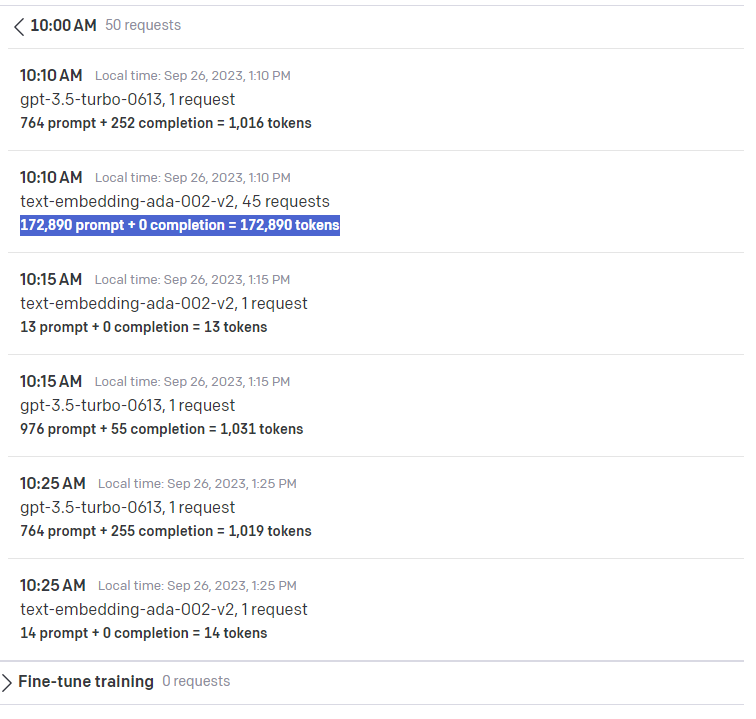

In [169]:
Image('images/Screenshot 2023-09-26 134307.png')